In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [6]:
df = pd.read_pickle("/Users/ilseeb/Desktop/Postgraduate/Train Punctuality Data/df_train_delays.pkl")

In [7]:
df.head()

,train_serv,delay_dep,delayed,month,destination_region,departure_region,temperature,relative_humidity,wind_speed,wind_direction,time_of_day,date,day_of_week
0,SNCB/NMBS,-53,False,JAN,BRUSSELS-CAPITAL REGION,WALLONIA,9.590943,84.870130,35.428463,185.24713,night,2014-01-01,Wednesday
1,SNCB/NMBS,11,False,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,6.050944,86.606674,23.784530,182.60257,morning,2014-01-01,Wednesday
2,SNCB/NMBS,197,False,JAN,FLANDERS,BRUSSELS-CAPITAL REGION,5.240944,89.317700,21.749481,192.42595,morning,2014-01-01,Wednesday
3,SNCB/NMBS,-1,False,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,6.840944,83.881490,23.770906,178.26430,morning,2014-01-01,Wednesday
4,SNCB/NMBS,159,False,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,7.490944,82.104470,22.253124,170.69006,afternoon,2014-01-01,Wednesday


In [9]:
df_delayed = df[df["delayed"] == True]

In [10]:
df_delayed.head()

,train_serv,delay_dep,delayed,month,destination_region,departure_region,temperature,relative_humidity,wind_speed,wind_direction,time_of_day,date,day_of_week
5,SNCB/NMBS,898,True,JAN,FLANDERS,BRUSSELS-CAPITAL REGION,5.520944,88.527885,22.065973,185.61758,morning,2014-01-01,Wednesday
15,SNCB/NMBS,832,True,JAN,BRUSSELS-CAPITAL REGION,FLANDERS,9.760943,80.675850,35.325890,182.92072,night,2014-01-01,Wednesday
25,SNCB/NMBS,466,True,JAN,FLANDERS,FLANDERS,5.310944,89.072090,21.897945,189.46233,morning,2014-01-01,Wednesday
35,SNCB/NMBS,516,True,JAN,FLANDERS,FLANDERS,9.250944,81.048710,33.857227,181.82797,night,2014-01-01,Wednesday
36,SNCB/NMBS,515,True,JAN,FLANDERS,FLANDERS,9.530944,81.033230,34.921856,180.59065,night,2014-01-01,Wednesday


In [20]:
df_delayed_count = df_delayed.groupby([df["date"]]).count()

In [21]:
df_delayed_count = df_delayed_count[["delayed"]]

In [27]:
df_delayed_count.head()

,delayed
date,
2014-01-01,29
2014-01-02,71
2014-01-03,44
2014-01-04,132
2014-01-05,51


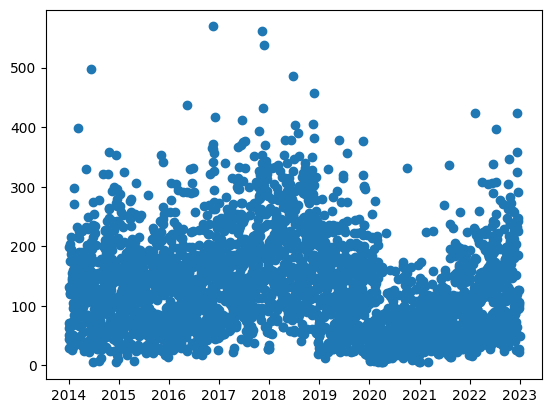

In [25]:
plt.scatter(df_delayed_count.index, df_delayed_count["delayed"])